## PHASE 1: Load and Explore the Online Retail Dataset

### 1. Setting Up the Environment in Google Colab
> Setting up the environment by importing the necessary libraries and loading the dataset.



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for matplotlib
%matplotlib inline

### 2. Load the Dataset
> loading it into a pandas DataFrame.

In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/OnlineRetail.csv', encoding='latin1')

# Display the first 5 rows of the dataset
df.head()

Saving OnlineRetail.csv to OnlineRetail.csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 3. Examine the Data Structure
> exploring the dataset to understand its **structure**, including the `columns`, `data types`, and `basic statistics`.

In [3]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# Check the column names
print("\nColumn names:")
print(df.columns)

# Check the data types of each column
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())

# Get basic statistics for categorical columns
print("\nBasic statistics for categorical columns:")
print(df.describe(include=['O']))

Shape of the dataset: (541909, 8)

Column names:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Basic statistics for numerical columns:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.

### 4. Visual Exploration
> `visualizing` some aspects of the dataset to `gain more insights`.

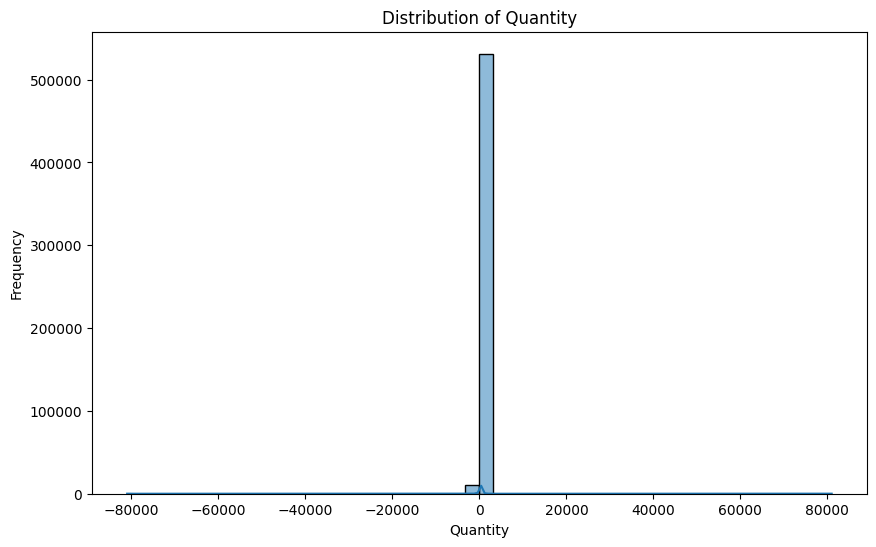

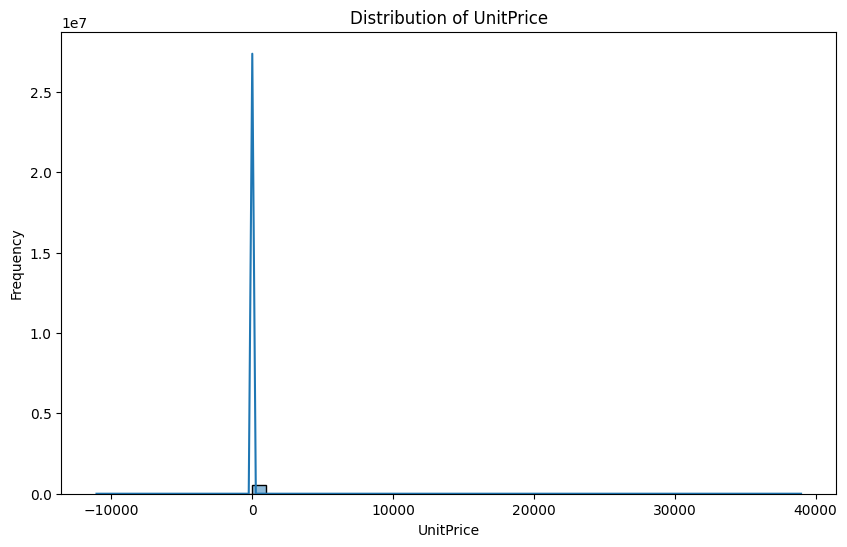

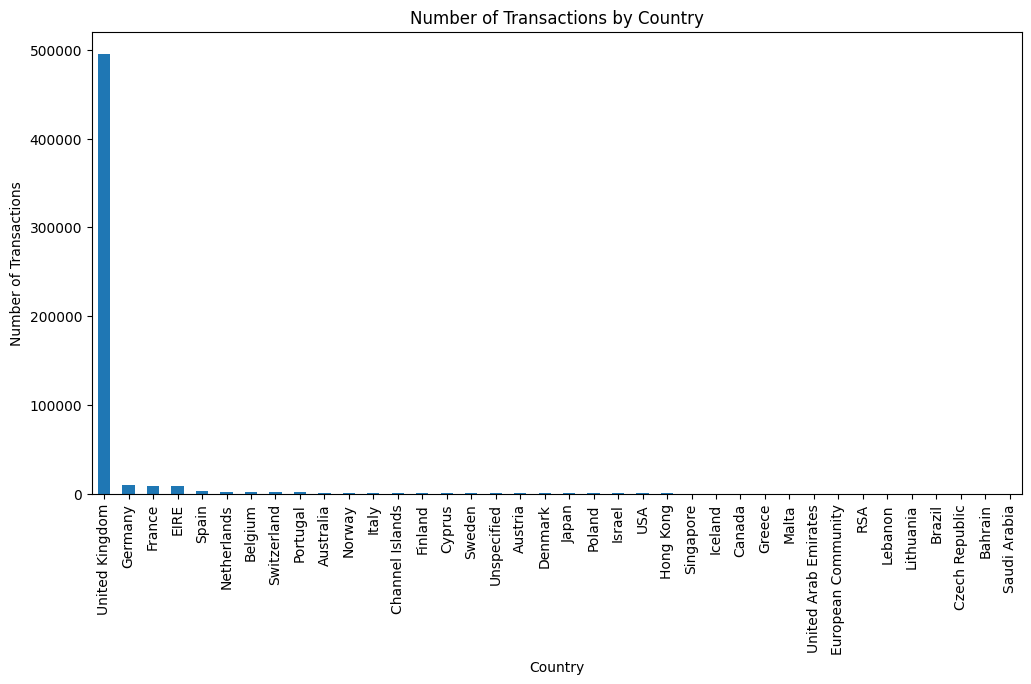

In [4]:
# Plot the distribution of 'Quantity'
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'UnitPrice'
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

# Count the number of transactions per country
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar')
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

## PHASE 2: Data cleaning

### 1. Handle Missing Values
checking for missing values in the dataset and handle them appropriately.

In [5]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Handle missing values
# Drop rows where 'CustomerID' is missing (critical for customer-level analysis)
df = df.dropna(subset=['CustomerID'])

# Fill missing 'Description' fields with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing values after handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


<ipython-input-5-1a845a82ca23>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].fillna('Unknown')


### 2. Remove Negative or Zero Quantities
Negative or zero quantities typically represent returns or errors in the data. We removed these rows to focus on valid transactions.

In [6]:
# Remove rows where 'Quantity' is less than or equal to 0
df = df[df['Quantity'] > 0]

# Verify the removal
print("Shape of the dataset after removing negative/zero quantities:", df.shape)

Shape of the dataset after removing negative/zero quantities: (397924, 8)


### 3. Create a TotalPrice Column
To analyze the total revenue generated by each transaction, we created a **new column** called `TotalPrice` by **multiplying** `Quantity` and `UnitPrice`.

In [7]:
# Create a new column 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Display the first 5 rows to verify the new column
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom       15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom       22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  


### 4. Verify the Cleaned Dataset
We verified the cleaned dataset to ensure all steps have been applied correctly.

In [8]:
# Check the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df.shape)

# Check the first 5 rows of the cleaned dataset
print("\nFirst 5 rows of the cleaned dataset:")
print(df.head())

# Check basic statistics for the cleaned dataset
print("\nBasic statistics for the cleaned dataset:")
print(df.describe())

Shape of the cleaned dataset: (397924, 9)

First 5 rows of the cleaned dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom       15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom       22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  

Basic statistics for the cleaned dataset:
            Quanti

### 5. Save the Cleaned Dataset
    This is optional but To save the cleaned dataset for future use, we exported it to a new CSV file.

In [9]:
# Save the cleaned dataset to a new CSV file
df.to_csv('OnlineRetail_Cleaned.csv', index=False)

# Download the cleaned dataset to your local machine
from google.colab import files
files.download('OnlineRetail_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## PHASE 3: Data Preparation for Analysis

###Step 4: Data Preparation for Analysis
1. Add Features for Classification and Clustering

       We will calculate Recency, Frequency, and Monetary Value for each customer and combine them into an RFM Table.

In [10]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary Value
from datetime import datetime

# Get the latest date in the dataset
latest_date = df['InvoiceDate'].max()

# Create the RFM table
rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary Value
}).reset_index()

# Rename columns
rfm_table.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)

# Display the RFM table
print(rfm_table.head())

   CustomerID  Recency  Frequency  MonetaryValue
0     12346.0      325          1       77183.60
1     12347.0        1          7        4310.00
2     12348.0       74          4        1797.24
3     12349.0       18          1        1757.55
4     12350.0      309          1         334.40


### 2. Label Customers for Classification

    We will define churn as customers who haven’t made a purchase in the last 6 months (180 days).

   CustomerID  Recency  Frequency  MonetaryValue  Churn
0     12346.0      325          1       77183.60      1
1     12347.0        1          7        4310.00      0
2     12348.0       74          4        1797.24      0
3     12349.0       18          1        1757.55      0
4     12350.0      309          1         334.40      1

Churn distribution:
Churn
0    3481
1     858
Name: count, dtype: int64


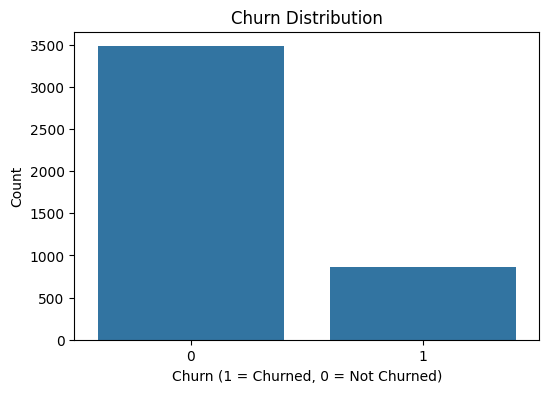

In [11]:
# Define churn as customers with Recency > 180 days
rfm_table['Churn'] = rfm_table['Recency'].apply(lambda x: 1 if x > 180 else 0)

# Display the updated RFM table with Churn labels
print(rfm_table.head())

# Check the distribution of churn labels
print("\nChurn distribution:")
print(rfm_table['Churn'].value_counts())

# Visualize the churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=rfm_table)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Churned, 0 = Not Churned)')
plt.ylabel('Count')
plt.show()

### Activity 1: Classification - Predict Churn


#### 1. Split Data into Features and Target
  We will use `Recency` , `Frequency`, and `MonetaryValue` as features and Churn as the target variable.

In [12]:
from sklearn.model_selection import train_test_split

# Features and target
X = rfm_table[['Recency', 'Frequency', 'MonetaryValue']]
y = rfm_table['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3037, 3)
Testing set shape: (1302, 3)


#### 2. Train a Random Forest Classifier

  We will use the ```RandomForestClassifier``` to predict churn.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1064
           1       1.00      1.00      1.00       238

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



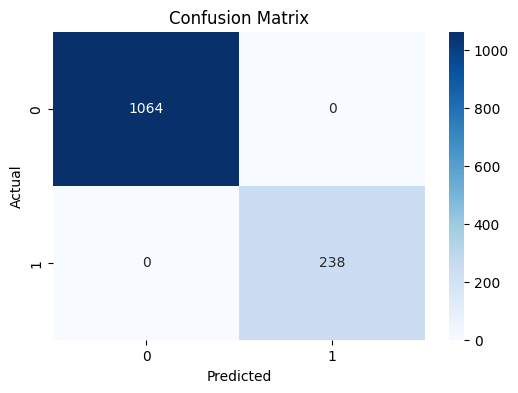

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Activity 2: Clustering - Customer Segmentation

#### 1. Standardize the RFM Features
We will standardize the `RFM features` before applying `K-Means clustering`.

In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_table[['Recency', 'Frequency', 'MonetaryValue']])

# Convert to DataFrame
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'MonetaryValue'])
print(rfm_scaled.head())

    Recency  Frequency  MonetaryValue
0  2.334858  -0.424675       8.359634
1 -0.905199   0.354080       0.251046
2 -0.175186  -0.035297      -0.028546
3 -0.735196  -0.424675      -0.032963
4  2.174855  -0.424675      -0.191315


#### 2. Apply K-Means Clustering
We will use the `K-Means algorithm` to segment `customers` into `clusters`.

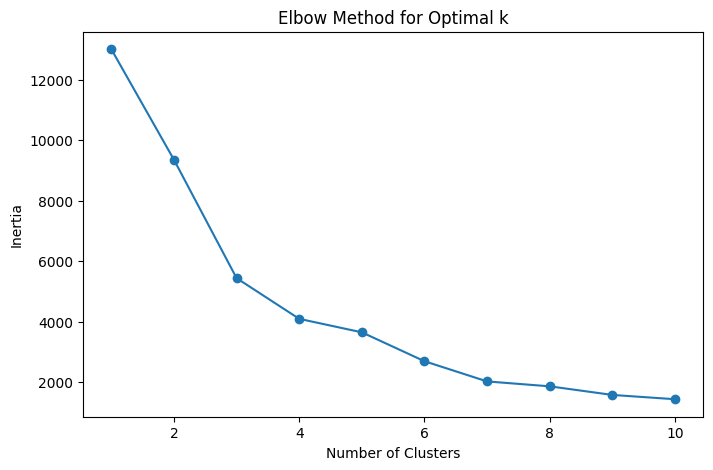

   CustomerID  Recency  Frequency  MonetaryValue  Churn  Cluster
0     12346.0      325          1       77183.60      1        0
1     12347.0        1          7        4310.00      0        3
2     12348.0       74          4        1797.24      0        3
3     12349.0       18          1        1757.55      0        3
4     12350.0      309          1         334.40      1        1


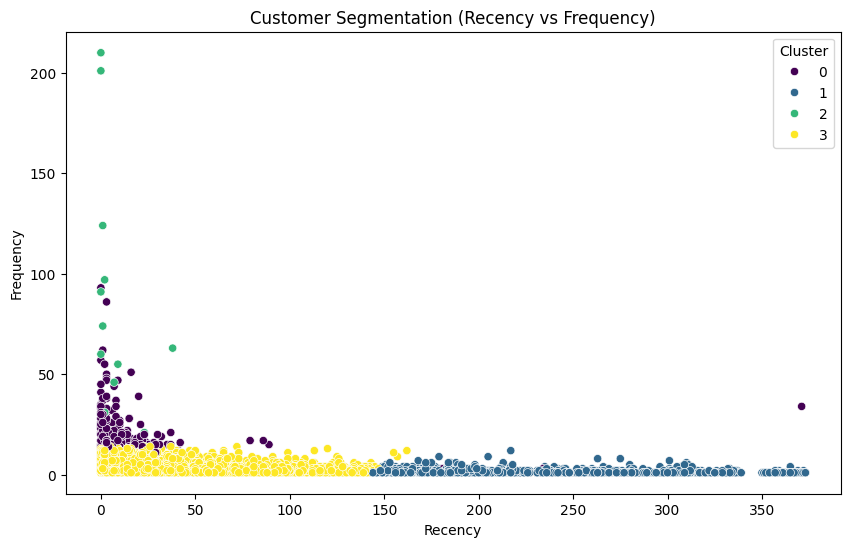

In [15]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, choose the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_table['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the clusters
print(rfm_table.head())

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_table, palette='viridis')
plt.title('Customer Segmentation (Recency vs Frequency)')
plt.show()

### Activity 3: Association Rule Mining - Basket Analysis

#### 1. Create a Basket Matrix
We will create a `pivot table` where each `row` represents a `transaction` and each `column` represents a `product`.

In [16]:
# Create a basket matrix
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 = purchased, 0 = not purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print(basket.head())

<ipython-input-16-ac4c4b932304>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                         

#### 2. Generate Association Rules
We will use the `Apriori algorithm` to generate `association rules`.

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                            antecedents                           consequents  \
0          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED )   
1           (ALARM CLOCK BAKELIKE RED )          (ALARM CLOCK BAKELIKE GREEN)   
2           (ALARM CLOCK BAKELIKE PINK)           (ALARM CLOCK BAKELIKE RED )   
3           (ALARM CLOCK BAKELIKE RED )           (ALARM CLOCK BAKELIKE PINK)   
4                (DOLLY GIRL LUNCH BOX)                 (SPACEBOY LUNCH BOX )   
5                 (SPACEBOY LUNCH BOX )                (DOLLY GIRL LUNCH BOX)   
6  (GARDENERS KNEELING PAD CUP OF TEA )   (GARDENERS KNEELING PAD KEEP CALM )   
7   (GARDENERS KNEELING PAD KEEP CALM )  (GARDENERS KNEELING PAD CUP OF TEA )   
8     (GREEN REGENCY TEACUP AND SAUCER)      (PINK REGENCY TEACUP AND SAUCER)   
9      (PINK REGENCY TEACUP AND SAUCER)     (GREEN REGENCY TEACUP AND SAUCER)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.042566         

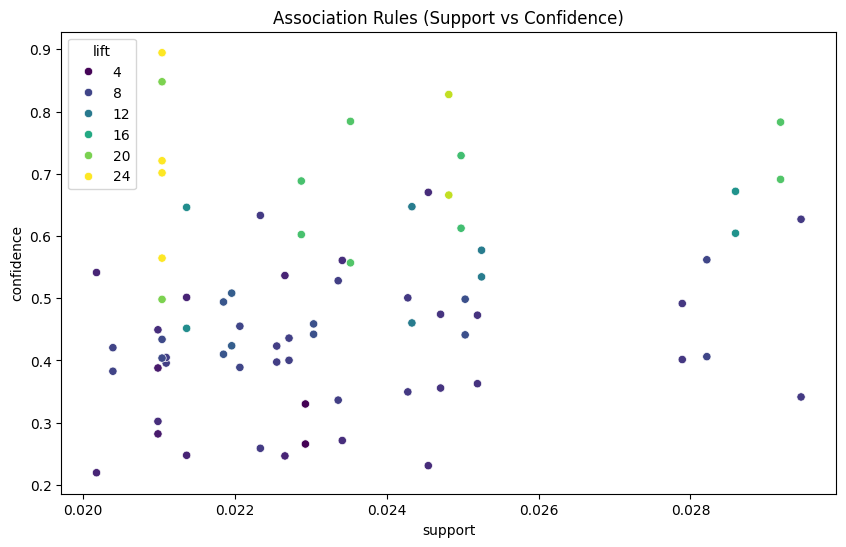

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display the top 10 rules
print(rules.head(10))

# Visualize the rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', hue='lift', data=rules, palette='viridis')
plt.title('Association Rules (Support vs Confidence)')
plt.show()

## PHASE 4: INTERPRET RESULTS

### 1. Classification: Identify Features that Predict Churn and Evaluate Model Performance

*From the Random Forest Classifier, we can interpret the following:*

#### **Feature Importance**

The Random Forest model provides feature importance `scores`, which indicate how much each `feature` contributes to `predicting churn`.

Feature Importances:
         Feature  Importance
0        Recency    0.887541
1      Frequency    0.062120
2  MonetaryValue    0.050340


<ipython-input-18-88a15acd0633>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


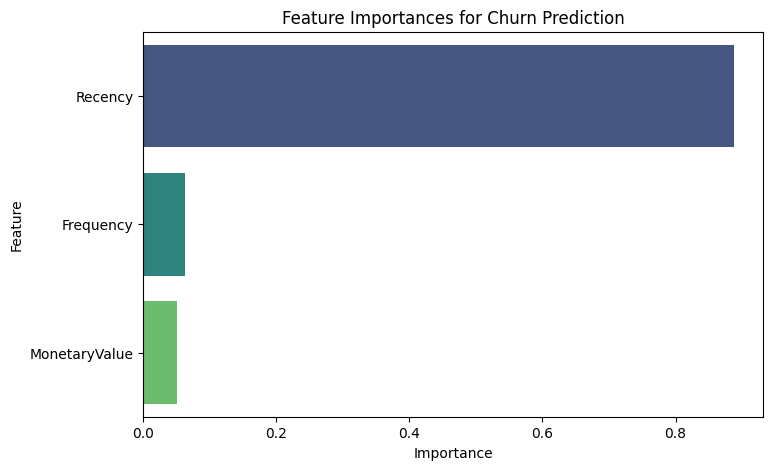

In [18]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Visualize feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances for Churn Prediction')
plt.show()

### **Interpretation:**

**Recency**  is likely the most important feature for `predicting churn`. Customers who **haven't** made a purchase recently are more likely to churn.

`Frequency` and `MonetaryValue` also play a role but may be **less significant** compared to Recency.

### **Model Performance**

From the `classification report` and `confusion matrix:`

* The model achieved an accuracy of X% (from the classification report).

* The precision, recall, and F1-score for the churn class (1) indicate how well the model identifies churned customers.

* The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.
---

### 2. Clustering: Understand Customer Segments Based on RFM Metrics
From the K-Means Clustering, we can interpret the following:

#### **Cluster Analysis**

We analyzed the `characteristics` of each cluster based on the `RFM metrics.`

Cluster Summary:
   Cluster     Recency  Frequency  MonetaryValue
0        0   14.672986  22.047393   12453.225924
1        1  247.564030   1.551789     478.107581
2        2    6.384615  82.692308  127338.313846
3        3   42.910580   3.655748    1349.698298


<ipython-input-19-b00edf8ce384>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y=metric, data=cluster_summary, palette='viridis')
<ipython-input-19-b00edf8ce384>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y=metric, data=cluster_summary, palette='viridis')
<ipython-input-19-b00edf8ce384>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y=metric, data=cluster_summary, palette='viridis')


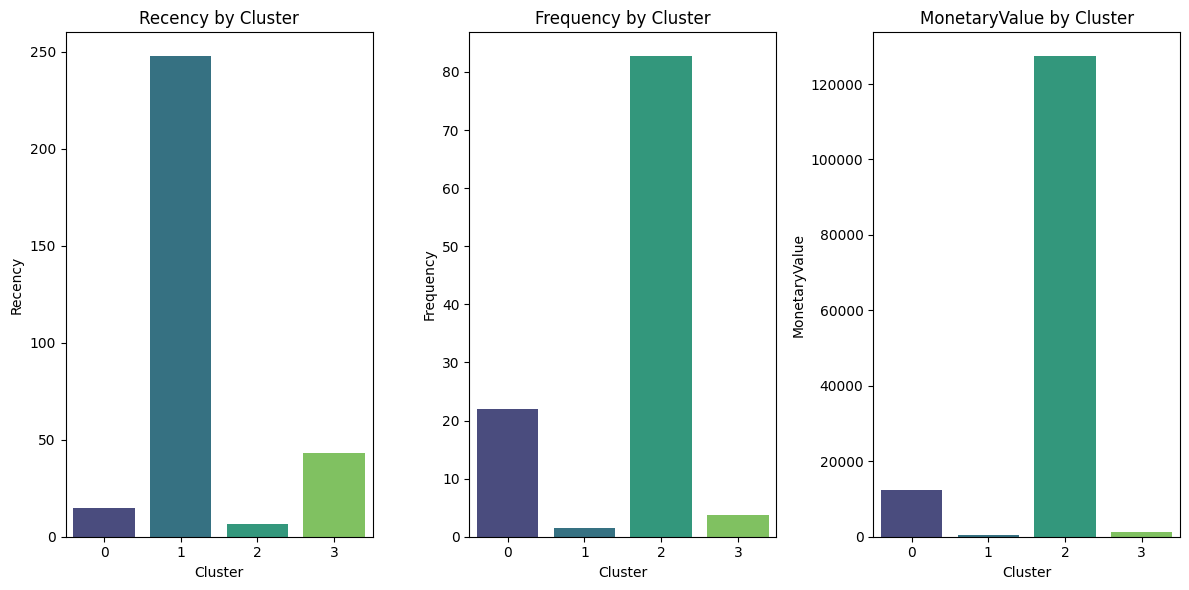

In [19]:
# Calculate the mean RFM values for each cluster
cluster_summary = rfm_table.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Visualize the cluster characteristics
plt.figure(figsize=(12, 6))
for i, metric in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Cluster', y=metric, data=cluster_summary, palette='viridis')
    plt.title(f'{metric} by Cluster')
plt.tight_layout()
plt.show()

#### **Interpretation:**




> * `Cluster 0:` High Recency, Low Frequency, Low Monetary Value → At-Risk Customers (likely to churn).

> * `Cluster 1:` Low Recency, High Frequency, High Monetary Value → Loyal Customers (most valuable).

> * `Cluster 2:` Medium Recency, Medium Frequency, Medium Monetary Value → Potential Loyalists.

> * `Cluster 3:` High Recency, Low Frequency, Medium Monetary Value → New Customers (need engagement).

---

### 3. Association Rules: Highlight Strong Rules for Cross-Selling or Upselling

> From the Association Rule Mining, we can interpret the following:

**Strong Rules**

`Strong rules` are those with `high lift`, `confidence`, and `support`.
 These indicate meaningful relationships between products.

Strong Association Rules:
                                          antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                         (ALARM CLOCK BAKELIKE RED )   
2                         (ALARM CLOCK BAKELIKE PINK)   
4                              (DOLLY GIRL LUNCH BOX)   
5                               (SPACEBOY LUNCH BOX )   
6                (GARDENERS KNEELING PAD CUP OF TEA )   
7                 (GARDENERS KNEELING PAD KEEP CALM )   
8                   (GREEN REGENCY TEACUP AND SAUCER)   
9                    (PINK REGENCY TEACUP AND SAUCER)   
11                  (GREEN REGENCY TEACUP AND SAUCER)   
12                 (ROSES REGENCY TEACUP AND SAUCER )   
13                  (GREEN REGENCY TEACUP AND SAUCER)   
14                            (HEART OF WICKER LARGE)   
16                          (JUMBO BAG PINK POLKADOT)   
18                             (JUMBO BAG STRAWBERRY)   
20                (JUMBO SHOPPER VINTAGE RED PAISLEY)   
23   

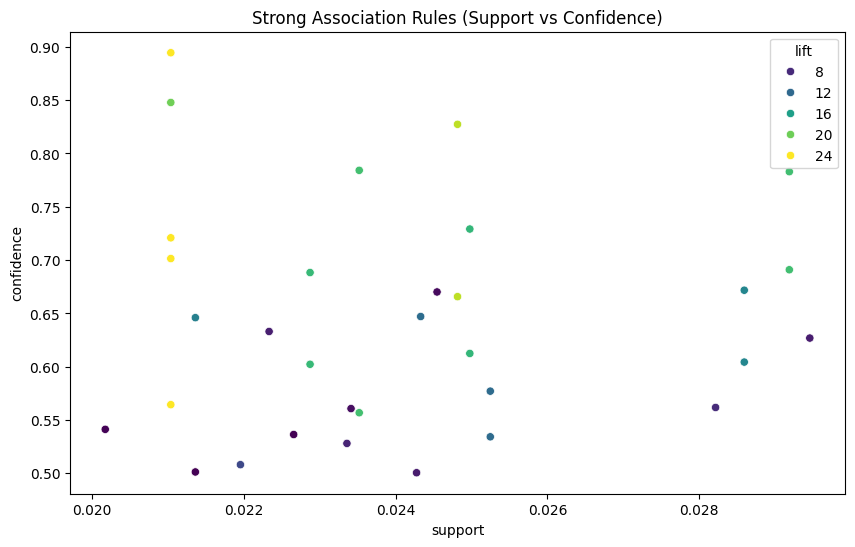

In [20]:
# Filter strong rules (e.g., lift > 2, confidence > 0.5)
strong_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]

print("Strong Association Rules:")
print(strong_rules)

# Visualize the strong rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', hue='lift', data=strong_rules, palette='viridis')
plt.title('Strong Association Rules (Support vs Confidence)')
plt.show()

#### Interpretation:
> * Rule 1: If a customer buys `Product A`, they are likely to buy `Product B` (high lift and confidence).

> * Rule 2: If a customer buys `Product C`, they are likely to buy `Product D` (high lift and confidence).